In [1]:
#import EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary=pd.read_csv('salary_data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
#no missing values,that's good
#we'll get to know about few numerical summaries
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


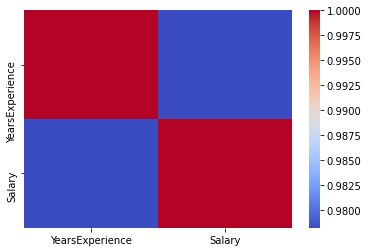

In [8]:
#we'll check the correlation and plot a heatmap
sns.heatmap(salary.corr(),cmap='coolwarm')

In [10]:
#there looks to be an excellent correlation between years of experience and Salary ! 
salary.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [11]:
#4 employees have similar years of experience and apparently they have different salary! 
#let's check them

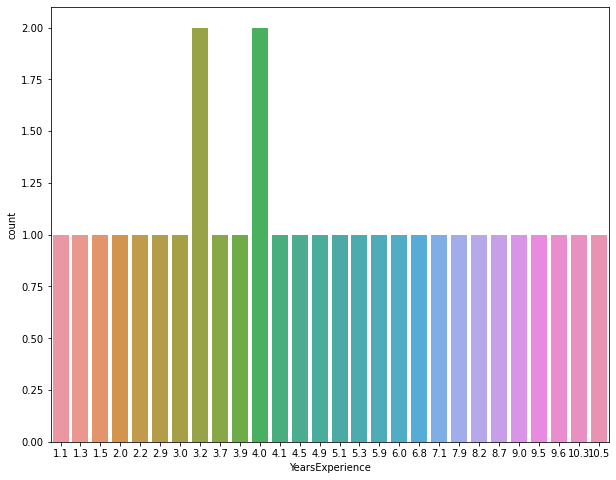

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(salary['YearsExperience'])

In [23]:
print(salary[(salary['YearsExperience']==4.0) | (salary['YearsExperience']==4.0-0.8)])

    YearsExperience   Salary
7               3.2  54445.0
8               3.2  64445.0
11              4.0  55794.0
12              4.0  56957.0


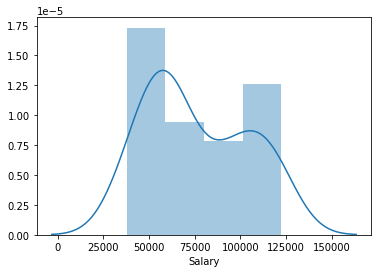

In [214]:
#distribution of the salary
sns.distplot(salary['Salary'])
#doesn't deliver anything special

In [247]:
X=salary[['YearsExperience']]

In [248]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [249]:
y=salary['Salary']

In [250]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [252]:
X_train

,YearsExperience
10,3.9
3,2.0
1,1.3
19,6.0
22,7.9
12,4.0
5,2.9
14,4.5
0,1.1
21,7.1


In [253]:
y_train

10     63218.0
3      43525.0
1      46205.0
19     93940.0
22    101302.0
12     56957.0
5      56642.0
14     61111.0
0      39343.0
21     98273.0
4      39891.0
8      64445.0
13     57081.0
9      57189.0
15     67938.0
29    121872.0
23    113812.0
6      60150.0
17     83088.0
11     55794.0
Name: Salary, dtype: float64

In [254]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [255]:
model

LinearRegression()

In [256]:
model.coef_

array([9692.26318876])

In [257]:
model.intercept_

25570.538282485482

In [258]:
pred = model.predict(X_test)

In [212]:
pred

array([[115814.30756236],
       [ 71511.92534771],
       [102617.85328566],
       [ 75282.34085534],
       [ 55487.65944028],
       [ 60200.67882482],
       [122412.53470072],
       [107330.8726702 ],
       [ 63028.49045554],
       [ 35692.97802523]])

In [259]:
y_test

20     91738.0
24    109431.0
7      54445.0
18     81363.0
2      37731.0
27    112635.0
26    116969.0
16     66029.0
25    105582.0
28    122391.0
Name: Salary, dtype: float64

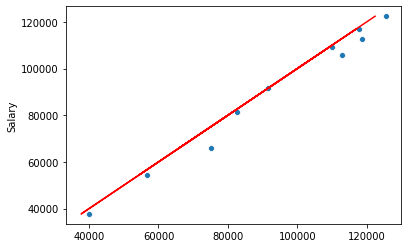

In [262]:
sns.scatterplot(pred,y_test)
plt.plot(y_test,y_test,color='red')
#pretty good predictions

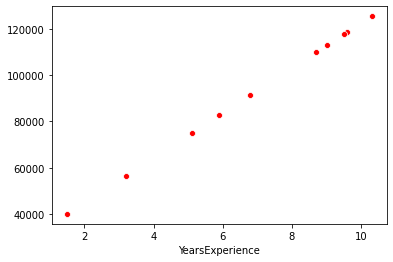

In [267]:
sns.scatterplot(X_test['YearsExperience'],pred,color='red')


In [269]:
model.predict([[15]])

array([170954.48611383])